# Bolt examples

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import bolt

## Matter transfer function, Figure 8.2 from Dodelson's Modern Cosmology

![Transfer functions from CLASS](./dodelson_matter_tk.png)

In [6]:
c = bolt.Cosmo(0.7, 0.3)
delta_cs = {}
ks = [0.001, 0.01, 0.1, 2]
results = {k: bolt.integrate(c, k) for k in ks}

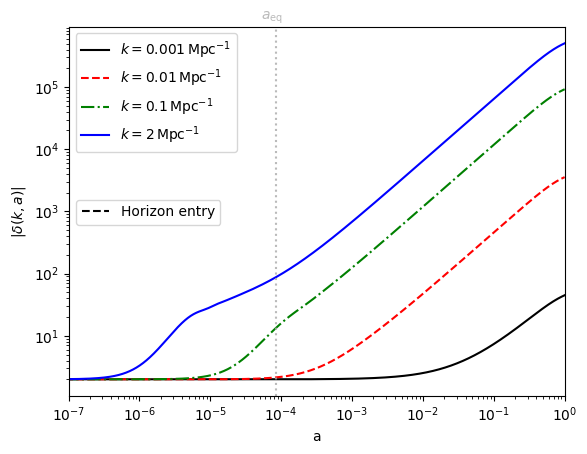

In [7]:
styles = [
    ("black", "-"),
    ("red", "--"),
    ("green", "-."),
    ("blue", "-"),
]

fig, ax = plt.subplots()
for k, (color, ls) in zip(ks, styles):
    a, y = results[k].as_np_arrays()
    delta_c = y[:, 0]
    delta_gamma = y[:, 2]
    ax.loglog(a, np.abs(delta_c), label=f"$k = {k} \\, \\mathrm{{Mpc}}^{{-1}}$", color=color, ls=ls)

ax.axvline(c.a_eq, c="darkgray", alpha=0.8, ls=":")
ax.text(c.a_eq/1.6, 1.2e6, r"$a_\mathrm{eq}$", c="darkgray", alpha=0.8)

ax.set_xlim([1e-7, 1])
ax.set_xlabel("a")
ax.set_ylabel(r"$|\delta(k, a)|$")
ax.legend()

line = matplotlib.lines.Line2D([], [], color='black', ls="--", label='Horizon entry')
legend = ax.legend()
ax.add_artist(legend)
ax.legend(handles=[line], bbox_to_anchor=(0.32, 0.55))
plt.savefig("dodelson_matter_tk_reproduction.pdf")

## The Matter Power Spectrum

Armed with the transfer functions, we can connect the initial power spectrum to the present-day one:
\begin{equation*}
    P(k, a) = \Delta_i(k) \times \frac{2\pi^2}{k^3} \times T^2(k, a),
\end{equation*}
where $T(k, a)$ is the matter transfer function (*i.e.* its numerical evolution) and $\Delta_i(k)$ is the initial dimensionless power spectrum,
\begin{equation*}
    \Delta_i(k) = A_s\left( \frac{k}{k_p}\right)^{n_s - 1}
\end{equation*}

In [19]:
ks = np.logspace(-3, 1, 100)
As = 2.1e-9
ns = 0.96
Pk = []
for k in ks:
    a, y = bolt.integrate(c, k).as_np_arrays()
    delta_c = y[:, 0]
    Pk_at_k = As*(k/0.05)**(ns-1) * 2 * np.pi**2 / k**3 * delta_c**2
    Pk.append(Pk_at_k)
Pk = np.array(Pk)

Text(0, 0.5, '$P(k) \\, (\\mathrm{Mpc}^3)$')

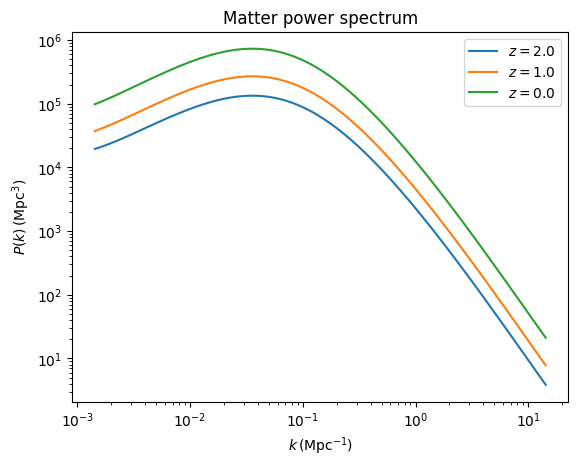

In [40]:
for i in [-200, -130, -1]:
    z = 1/a[i] - 1
    plt.loglog(ks/c.h, Pk[:, i], label=f"$z = {z:.1f}$")
plt.title(f"Matter power spectrum")
plt.legend()
plt.xlabel(r"$k \, (\mathrm{Mpc}^{-1})$")
plt.ylabel(r"$P(k) \, (\mathrm{Mpc}^3)$")